In [52]:
import pandas as pd

In [53]:
df = pd.read_csv('training/p000001.psv', sep = '|')

In [54]:
df2 = pd.read_csv('training/p000002.psv', sep='|')

In [55]:
merge = pd.read_csv('training/merged.psv', sep='|')

# Merge psv files 

In [56]:
merge

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790210,88.0,98.0,NaN,135.0,81.00,64.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,31,1
790211,96.0,98.0,38.72,174.0,97.00,72.0,16.0,NaN,2.0,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,32,1
790212,140.0,97.0,NaN,133.0,81.50,62.5,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,33,1
790213,120.0,96.0,NaN,154.0,118.00,105.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,34,1


Replace Nan with 0 for now

In [57]:
merge = merge.ffill().bfill()

In [60]:
merge.drop('EtCO2', axis=1, inplace=True)

In [61]:
merge.isna().sum()

HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
Gender              0
Unit1               0
Unit2               0
HospAdmTime         0
ICULOS              0
SepsisLabel         0
dtype: int64

# Train random forest model 

In [62]:
y = merge.pop('SepsisLabel')
X = merge

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)

In [66]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [67]:
y_pred = clf.predict(X_test)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    255118
           1       0.00      0.00      0.00      5653

    accuracy                           0.98    260771
   macro avg       0.49      0.50      0.49    260771
weighted avg       0.96      0.98      0.97    260771



/Users/zacharybarnes/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


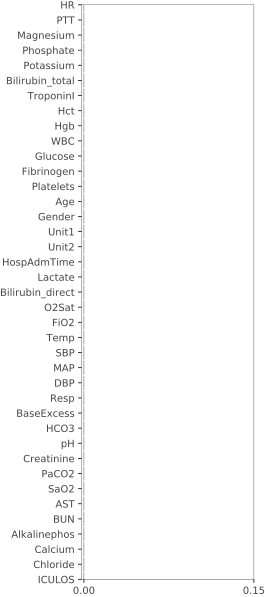

In [69]:
from rfpimp import *
I = importances(clf, X, y)
plot_importances(I)

# Save model using pickle 

In [114]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename,'wb'))

In [115]:
loaded_model = pickle.load(open(filename, 'rb'))

In [117]:
loaded_model.predict_proba(X)

array([[0.98190049, 0.01809951],
       [0.98111191, 0.01888809],
       [0.98208537, 0.01791463],
       ...,
       [0.97801005, 0.02198995],
       [0.977953  , 0.022047  ],
       [0.977953  , 0.022047  ]])